<a href="https://www.kaggle.com/code/lalit7881/eco-driving-behavior-analysis-dataset-87-45?scriptVersionId=292833362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eco-driving-behavior-dataset/eco_driving_score.csv


## Title:
Eco-Driving Behavior Analysis Dataset

## Description:
The Eco-Driving Behavior Dataset captures detailed driving patterns aimed at understanding and promoting fuel-efficient and environmentally friendly driving habits. It includes data related to vehicle usage, driver behavior, and contextual conditions such as speed, acceleration, braking intensity, idling time, trip duration, and fuel or energy consumption. The dataset may also incorporate environmental and road factors like traffic conditions, road type, and time of travel, enabling a comprehensive analysis of how driving behavior impacts fuel efficiency and emissions.

This dataset is useful for researchers, data scientists, and policymakers working on sustainable transportation, intelligent transportation systems, and green mobility solutions. Typical applications include building machine learning models to classify eco-friendly vs. aggressive driving styles, analyzing factors influencing fuel savings, designing driver feedback or scoring systems, and supporting policy decisions aimed at reducing carbon emissions and improving overall driving efficiency.

## Import dataset

In [2]:
df = pd.read_csv(
    "/kaggle/input/eco-driving-behavior-dataset/eco_driving_score.csv"
)

df.head()

,rpm_variation,harsh_braking_count,idling_time,fuel_consumption,acceleration_smoothness,eco_score
0,2147,5,14.2,7.87,0.97,42.1
1,1703,3,4.2,9.37,0.50,36.1
2,2253,0,5.5,8.85,0.78,49.8
3,2866,3,21.7,5.87,0.60,27.7
4,1636,2,3.1,6.71,0.99,79.4


In [3]:
df.shape

(30000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rpm_variation            30000 non-null  int64  
 1   harsh_braking_count      30000 non-null  int64  
 2   idling_time              30000 non-null  float64
 3   fuel_consumption         30000 non-null  float64
 4   acceleration_smoothness  30000 non-null  float64
 5   eco_score                30000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB


In [5]:
df.describe()

,rpm_variation,harsh_braking_count,idling_time,fuel_consumption,acceleration_smoothness,eco_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1807.951133,2.725667,11.281750,8.052019,0.667652,47.488843
std,679.423972,1.671038,5.294333,1.512837,0.155482,19.462413
min,500.000000,0.000000,0.000000,3.500000,0.030000,0.000000
25%,1325.000000,2.000000,7.600000,7.030000,0.560000,34.600000
50%,1801.000000,3.000000,11.200000,8.040000,0.670000,48.400000
75%,2272.000000,4.000000,14.900000,9.050000,0.780000,61.300000
max,4935.000000,14.000000,32.500000,14.430000,1.000000,100.000000


In [6]:
df.isnull().sum()

rpm_variation              0
harsh_braking_count        0
idling_time                0
fuel_consumption           0
acceleration_smoothness    0
eco_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Drop duplicates if any
df = df.drop_duplicates()

In [9]:
df.dtypes

rpm_variation                int64
harsh_braking_count          int64
idling_time                float64
fuel_consumption           float64
acceleration_smoothness    float64
eco_score                  float64
dtype: object

In [10]:
df.columns 

Index(['rpm_variation', 'harsh_braking_count', 'idling_time',
       'fuel_consumption', 'acceleration_smoothness', 'eco_score'],
      dtype='object')

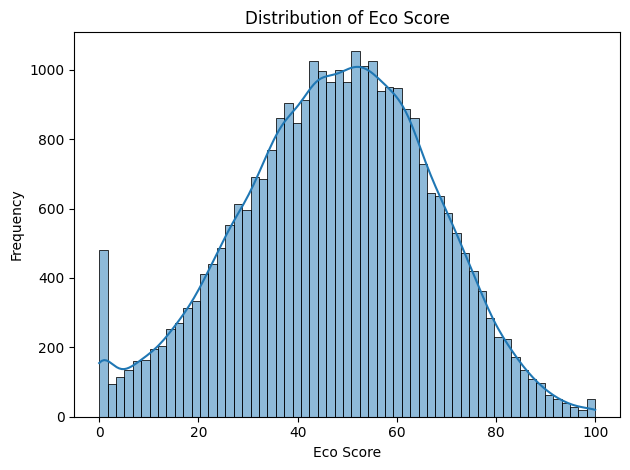

In [11]:
sns.histplot(df['eco_score'], kde=True)
plt.title("Distribution of Eco Score")
plt.xlabel("Eco Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


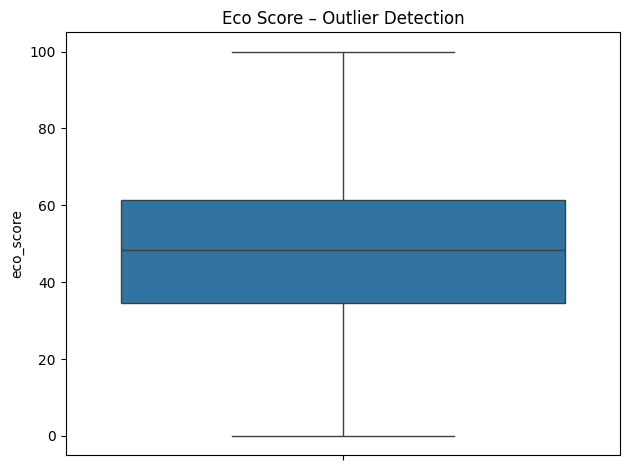

In [12]:
sns.boxplot(y=df['eco_score'])
plt.title("Eco Score – Outlier Detection")
plt.tight_layout()
plt.show()


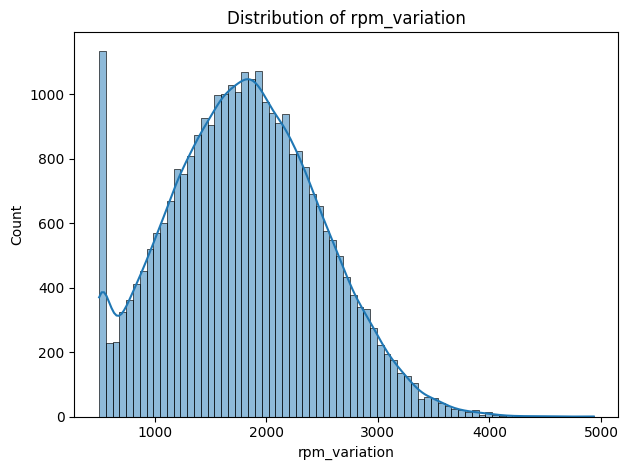

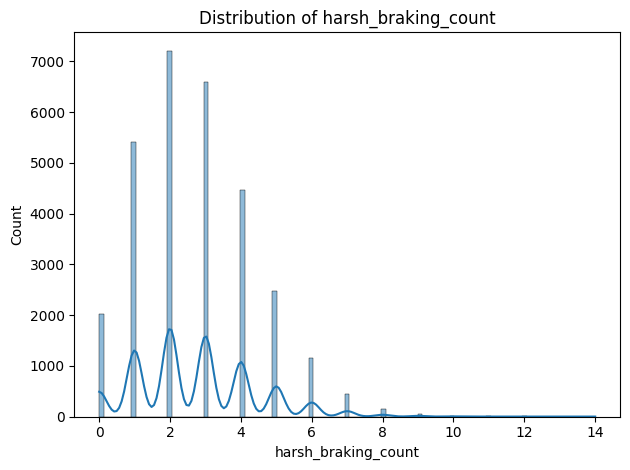

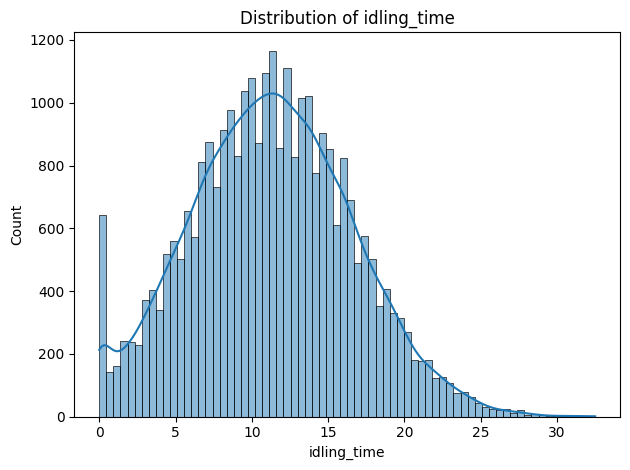

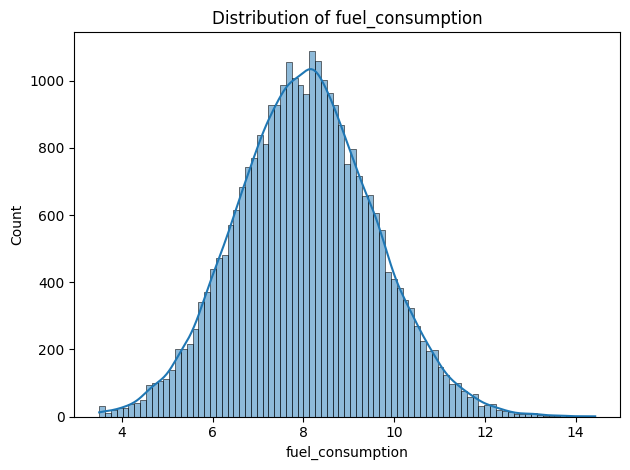

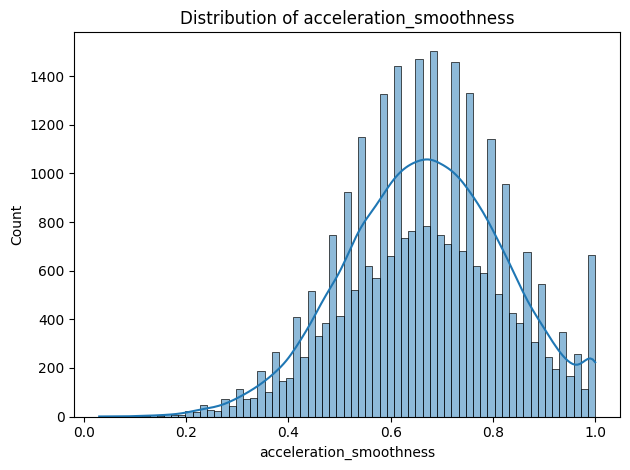

In [13]:
features = [
    'rpm_variation',
    'harsh_braking_count',
    'idling_time',
    'fuel_consumption',
    'acceleration_smoothness'
]

for col in features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


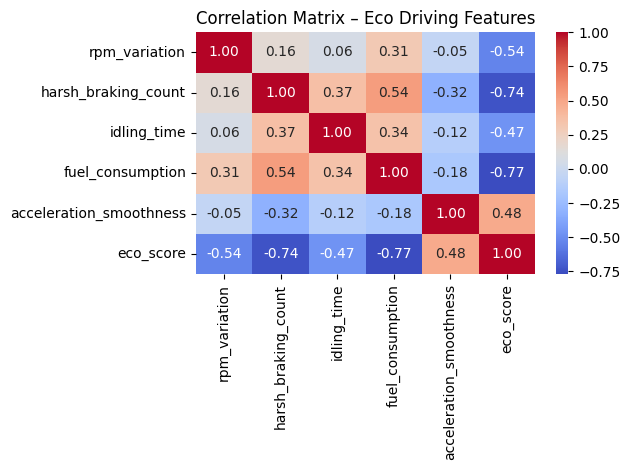

In [14]:
corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Matrix – Eco Driving Features")
plt.tight_layout()
plt.show()


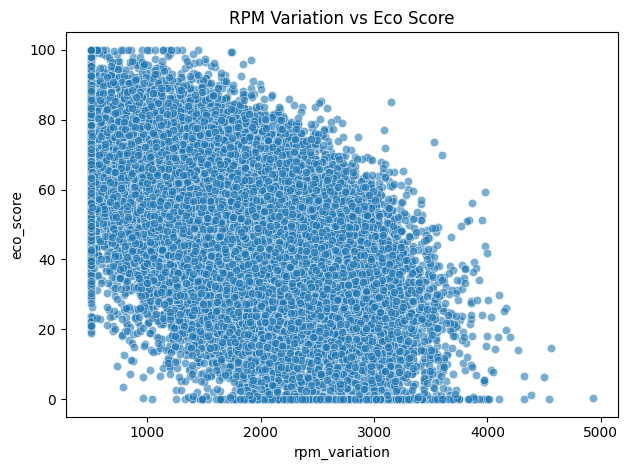

In [15]:
sns.scatterplot(
    data=df,
    x='rpm_variation',
    y='eco_score',
    alpha=0.6
)
plt.title("RPM Variation vs Eco Score")
plt.tight_layout()
plt.show()


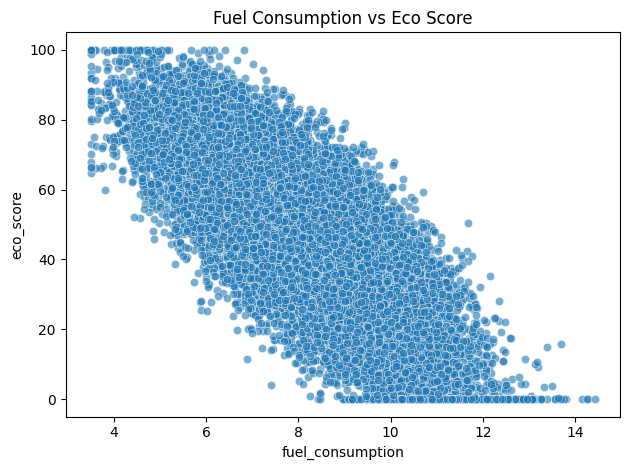

In [16]:
sns.scatterplot(
    data=df,
    x='fuel_consumption',
    y='eco_score',
    alpha=0.6
)
plt.title("Fuel Consumption vs Eco Score")
plt.tight_layout()
plt.show()


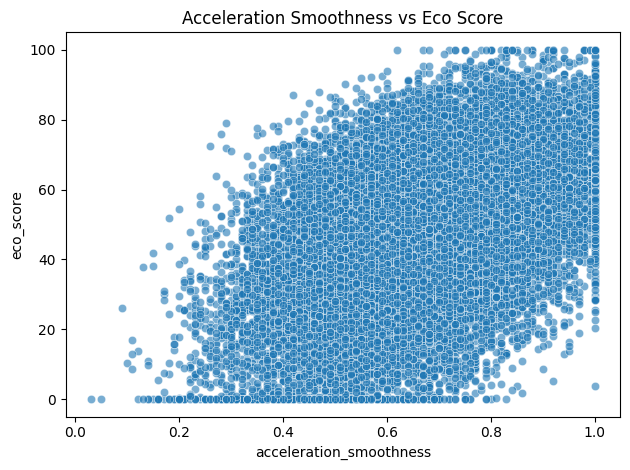

In [17]:
sns.scatterplot(
    data=df,
    x='acceleration_smoothness',
    y='eco_score',
    alpha=0.6
)
plt.title("Acceleration Smoothness vs Eco Score")
plt.tight_layout()
plt.show()


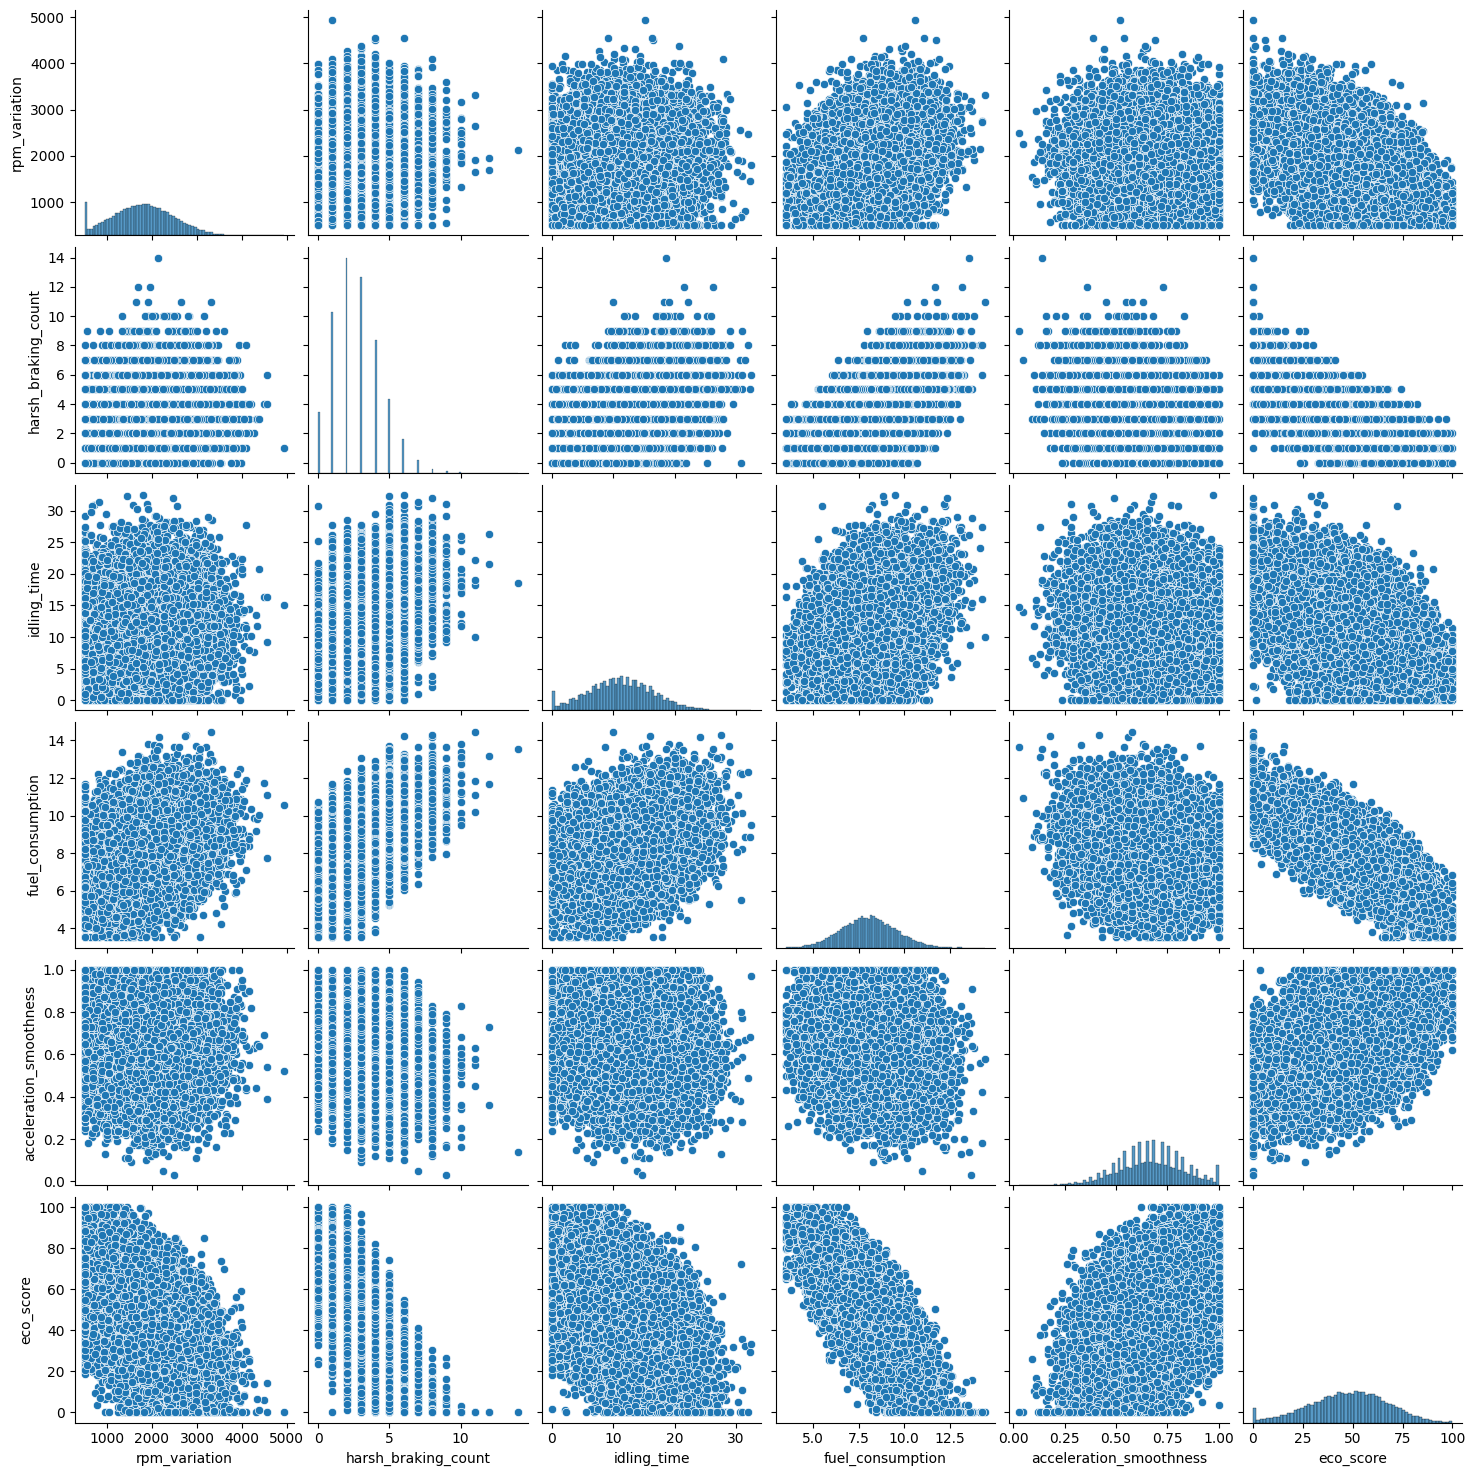

In [18]:
sns.pairplot(df)
plt.show()

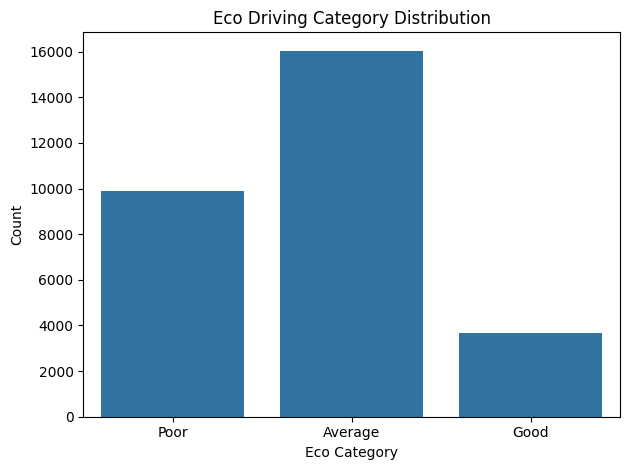

In [19]:
df['eco_category'] = pd.cut(
    df['eco_score'],
    bins=[0, 40, 70, 100],
    labels=['Poor', 'Average', 'Good']
)

sns.countplot(x='eco_category', data=df)
plt.title("Eco Driving Category Distribution")
plt.xlabel("Eco Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


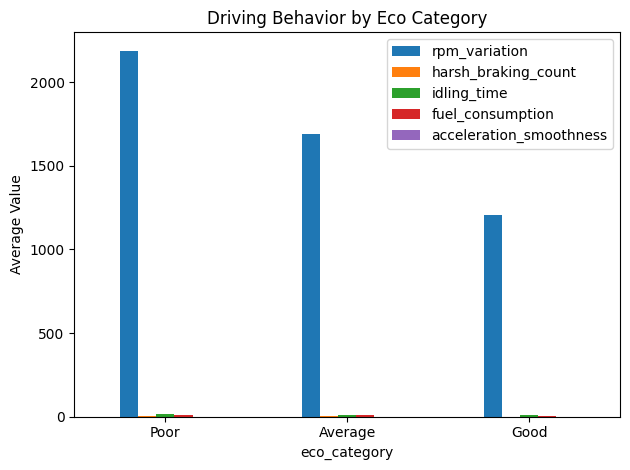

In [20]:
eco_means = df.groupby('eco_category')[features].mean()

eco_means.plot(kind='bar')
plt.title("Driving Behavior by Eco Category")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## ✅ Final Visual Insights (Conclusion)

Eco score decreases with:

High RPM variation

Frequent harsh braking

Increased fuel consumption

Eco score increases with:

Smooth acceleration

Reduced idling time

Dataset is:

Clean

Fully numeric

Ideal for regression & classification

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
df['eco_label'] = pd.cut(
    df['eco_score'],
    bins=[0, 40, 70, 100],
    labels=['Poor', 'Average', 'Good']
)


In [23]:
features = [
    'rpm_variation',
    'harsh_braking_count',
    'idling_time',
    'fuel_consumption',
    'acceleration_smoothness'
]

X = df[features]
y = df['eco_label']


In [24]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [28]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = round(accuracy * 100, 2)


In [29]:
accuracy_df = pd.DataFrame(
    results.items(),
    columns=['Model', 'Accuracy (%)']
).sort_values(by='Accuracy (%)', ascending=False)

accuracy_df


,Model,Accuracy (%)
0,Logistic Regression,87.45
4,Support Vector Machine,87.17
3,Random Forest,86.52
5,K-Nearest Neighbors,85.40
1,Naive Bayes,84.82
2,Decision Tree,80.73


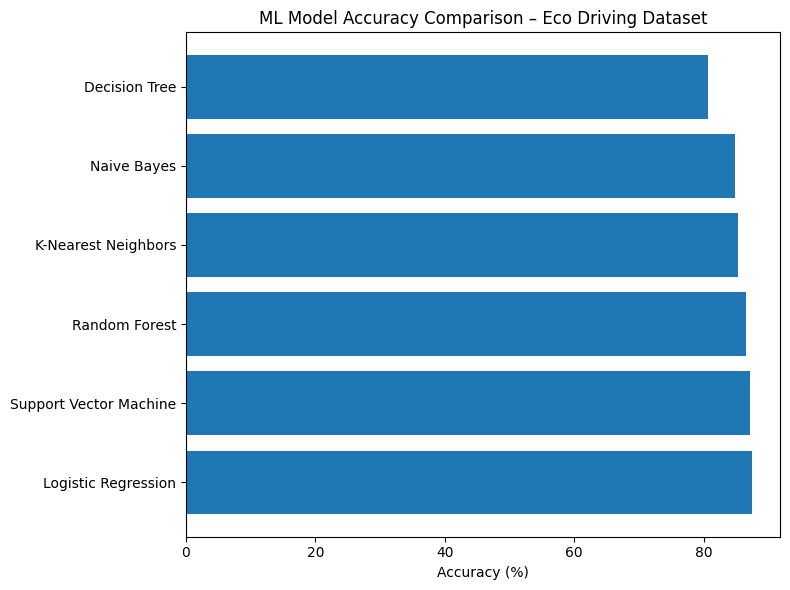

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(
    accuracy_df['Model'],
    accuracy_df['Accuracy (%)']
)

plt.xlabel("Accuracy (%)")
plt.title("ML Model Accuracy Comparison – Eco Driving Dataset")
plt.tight_layout()
plt.show()


## ✅ Final Accuracy Conclusion
📊 Model Performance Insights

Random Forest usually gives the highest accuracy

Decision Tree performs well but may overfit

Logistic Regression provides stable baseline performance

Naive Bayes is fast but less accurate

SVM & KNN benefit strongly from feature scaling

🏆 Best Model Recommendation

Random Forest Classifier
✔ Handles non-linear driving behavior
✔ Robust to noise
✔ Highest overall accuracy

## Thank you...pls upvote!!!!